In [202]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
from selenium import webdriver
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## noxinfluencer 에서 한국 top100 유튜버 정보 크롤링 하여 df1 데이터프레임에 저장

In [2]:
driver = webdriver.Chrome('chromedriver')
driver.get("https://kr.noxinfluencer.com/youtube-channel-rank/top-100-kr-all-youtuber-sorted-by-subs-weekly/")    
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") #페이지 제일 밑으로 스크롤
#페이지 제일 밑으로 스크롤을 해야 숨겨진 51~100위 순위가 나오고 숨겨진 모든 소스코드들이 나온다

time.sleep(5) #제대로 모든 소스코드들이 로딩 되도록 5초간 대기

html = driver.page_source
soup = BeautifulSoup(html,'lxml')

In [3]:
channel_name = []
category = []
subscriber = []
avg_views = []
score = []

detail_url = [] # 상세 정보 페이지 주소를 저장할 리스트
url = 'https://kr.noxinfluencer.com'

for i in range(100):
    channel_name.append(soup.find_all("span",{"class":"name kol-name"})[i].string.lstrip()) #lstrip() : 왼쪽 공백 제거해서 리스트에 추가
    
    category.append(soup.find_all("a",{"class":"category-text"})[i].string.strip()) #strip() : 앞뒤 공백 모두 제거해서 리스트에 추가
    
    a = soup.find_all("td",{"class":"text followerNum with-num"})[i]
    subscriber.append(a.find("span",{"class":"num"}).string.strip())
    
    a = soup.find_all("td",{"class":"text avgView with-num"})[i]
    avg_views.append(a.find("span",{"class":"num"}).string.strip())
    
    a = soup.find_all("td",{"class":"text nox-score"})[i]
    score.append(a['data-score'])
    
    detail_url.append(url + soup.find_all("a",{"class":"star-avatar"})[i+1]['href'])

In [4]:
df1 = pd.DataFrame({'순위':['TOP '+str(i+1) for i in range(100)], '채널명':channel_name, '카테고리':category, 
                                            '구독자':subscriber, '평균 조회수':avg_views, 'Nox평점':score})

df1

,순위,채널명,카테고리,구독자,평균 조회수,Nox평점
0,TOP 1,BLACKPINK,음악,3180만,1754.16만,2.05
1,TOP 2,ibighit,음악,3040만,800.44만,4.76
2,TOP 3,BANGTANTV,음악,2380만,204.13만,4.08
3,TOP 4,SMTOWN,음악,2080만,174.75만,3.39
4,TOP 5,1MILLION Dance Studio,엔터테인먼트,1870만,62.03만,3.14
5,TOP 6,1theK (원더케이),엔터테인먼트,1830만,2만,3.27
6,TOP 7,jypentertainment,음악,1440만,269.67만,4.48
7,TOP 8,Boram Tube ToysReview [보람튜브 토이리뷰],인물/블로그,1400만,200.25만,2.41
8,TOP 9,JFlaMusic,음악,1390만,460.79만,3.23
9,TOP 10,officialpsy,음악,1320만,3545.09만,1.83


In [5]:
# 각 채널별 상세 정보 페이지 열어서 추가정보 가져오기

for i in range(100):
    driver.get(detail_url[i])

    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    
    df1.loc[i,'전체 동영상'] = soup.find_all("span",{"class":"strong"})[3].string
    df1.loc[i,'최근 1개월 동영상'] = soup.find_all("span",{"class":"title"})[-16].string
    df1.loc[i,'채널 개설일'] = soup.find_all("span",{"class":"subtitle"})[0].string
    df1.loc[i,'채널주소'] = soup.find_all("a",{"class":"icon-wrapper"})[0]['href']
    
    time.sleep(5) # 계속 크롤링하면 로봇 확인 페이지가 떠서 이를 방지하기 위해 5초씩 대기
    
driver.close()

In [7]:
# 최종 df1 데이터프레임
df1

,순위,채널명,카테고리,구독자,평균 조회수,Nox평점,전체 동영상,최근 1개월 동영상,채널 개설일,채널주소
0,TOP 1,BLACKPINK,음악,3180만,1754.16만,2.05,253,0,2016-06-28,https://www.youtube.com/channel/UCOmHUn--16B90...
1,TOP 2,ibighit,음악,3040만,800.44만,4.76,347,12,2008-06-04,https://www.youtube.com/channel/UC3IZKseVpdzPS...
2,TOP 3,BANGTANTV,음악,2380만,204.13만,4.08,1101,26,2012-12-16,https://www.youtube.com/channel/UCLkAepWjdylmX...
3,TOP 4,SMTOWN,음악,2080만,174.75만,3.39,3939,19,2006-03-18,https://www.youtube.com/channel/UCEf_Bc-KVd7on...
4,TOP 5,1MILLION Dance Studio,엔터테인먼트,1870만,62.03만,3.14,1764,39,2015-02-06,https://www.youtube.com/channel/UCw8ZhLPdQ0u_Y...
5,TOP 6,1theK (원더케이),엔터테인먼트,1830만,2만,3.27,1.67만,251,2011-01-30,https://www.youtube.com/channel/UCweOkPb1wVVH0...
6,TOP 7,jypentertainment,음악,1440만,269.67만,4.48,1038,12,2008-01-24,https://www.youtube.com/channel/UCaO6TYtlC8U5t...
7,TOP 8,Boram Tube ToysReview [보람튜브 토이리뷰],인물/블로그,1400만,200.25만,2.41,246,10,2016-05-18,https://www.youtube.com/channel/UC3pnQ7MHDABUF...
8,TOP 9,JFlaMusic,음악,1390만,460.79만,3.23,243,3,2011-08-22,https://www.youtube.com/channel/UClkRzsdvg7_RK...
9,TOP 10,officialpsy,음악,1320만,3545.09만,1.83,89,1,2010-10-03,https://www.youtube.com/channel/UCrDkAvwZum-UT...


## utu(유투) 에서 한국 top100 유튜버 정보 크롤링 하여 df2 데이터프레임에 저장

In [8]:
driver = webdriver.Chrome('chromedriver')
driver.get("https://utu.kr/rank")
driver.find_element_by_xpath("""//*[@id="srange"]""").send_keys("구독자 순") # 구독자 순으로 순위 정렬

time.sleep(3) # 페이지가 로딩될 때까지 3초 대기

# 더보기를 눌러야 채널 20개씩 새로 로딩 됨
driver.find_element_by_xpath("""//*[@id="Rank_main_container"]/button""").click() # 더보기 클릭
time.sleep(3)
driver.find_element_by_xpath("""//*[@id="Rank_main_container"]/button""").click() # 더보기 클릭
time.sleep(3)
driver.find_element_by_xpath("""//*[@id="Rank_main_container"]/button""").click() # 더보기 클릭
time.sleep(3)
driver.find_element_by_xpath("""//*[@id="Rank_main_container"]/button""").click() # 더보기 클릭
time.sleep(3)
driver.find_element_by_xpath("""//*[@id="Rank_main_container"]/button""").click() # 더보기 클릭
time.sleep(3)

html = driver.page_source
soup = BeautifulSoup(html,'lxml')

In [9]:
channel_name = []
category = []
UTU_score = []
subscriber = []
views = []
like = []
dislike = []
comment = []

for i in range(100):
    channel_name.append(soup.find_all("span",{"class":"chName"})[i].string)
    category.append(soup.find_all("p",{"class":"cateName"})[i].string)
    UTU_score.append(soup.find_all("div",{"class":"list-score text-center"})[i+1].string)
    subscriber.append(soup.find_all("div",{"class":"list-person text-center"})[i+1].string)
    views.append(soup.find_all("div",{"class":"list-view text-center"})[i+1].string.split('*')[0]) # 조회수 옆에 붙은 *는 제거해서 삽입
    like.append(soup.find_all("div",{"class":"list-like text-center View_Desktop"})[i+1].string.split('*')[0])
    dislike.append(soup.find_all("div",{"class":"list-unlike text-center View_Desktop"})[i+1].string)
    comment.append(soup.find_all("div",{"class":"list-reply text-center View_Desktop"})[i+1].string)
    
driver.close()

In [10]:
df2 = pd.DataFrame({'순위':['TOP '+str(i+1) for i in range(100)], '채널명':channel_name, '카테고리':category, 'UTU점수':UTU_score,
                                            '구독자':subscriber, '조회수':views, '좋아요':like, '싫어요':dislike, '댓글':comment})

# 최종 df2 데이터프레임
df2

,순위,채널명,카테고리,UTU점수,구독자,조회수,좋아요,싫어요,댓글
0,TOP 1,BLACKPINK,영화/엔터 > 음악,75점,"3,170 만",79 억,"5,088 만",173 만,502 만
1,TOP 2,ibighit,영화/엔터 > 엔터,78점,"3,040 만",75 억,1.4 억,270 만,"1,930 만"
2,TOP 3,GellyBear ToyPudding,키즈/동물 > 놀이,48점,"2,550 만",148 억,30 만,13 만,1.7 만
3,TOP 4,BANGTANTV,영화/엔터 > 엔터,81점,"2,370 만",32 억,1.5 억,42 만,853 만
4,TOP 5,Boram Tube Vlog [보람튜브 브이로그],키즈/동물 > 놀이,63점,"2,190 만",81 억,423 만,189 만,6.0 만
5,TOP 6,SMTOWN,영화/엔터 > 음악,63점,"2,070 만",157 억,2.3 억,486 만,"2,203 만"
6,TOP 7,1MILLION Dance Studio,영화/엔터 > 음악,75점,"1,860 만",45 억,"5,827 만",75 만,109 만
7,TOP 8,1theK (원더케이),영화/엔터 > 음악,62점,"1,832 만",150 억,"1,020 만",19 만,73 만
8,TOP 9,jypentertainment,영화/엔터 > 음악,79점,"1,440 만",78 억,"8,785 만",408 만,914 만
9,TOP 10,Boram Tube ToysReview [보람튜브 토이리뷰],키즈/동물 > 놀이,59점,"1,400 만",44 억,623 만,279 만,13 만


## df1과 df2 채널명이 같은 것끼리 항목(column) 합쳐서 df3 만들기

In [353]:
df3 = pd.merge(df1,df2,on='채널명') # df1과 df2 병함 (채널명이 같은 행만 합치고 같지 않은 행은 삭제)
df3.drop(['순위_x','순위_y','구독자_y',], axis='columns', inplace=True) # 필요없는 열 삭제
df3.rename(columns={'카테고리_x': '카테고리1', '카테고리_y': '카테고리2', '구독자_x':'구독자'}, inplace=True) # 열 이름 변경
df3 = df3.drop_duplicates('채널명', keep='first') # 중복 채널명 행 삭제(처음 나오는 행을 유지)
column_titles = ['채널명','카테고리1','카테고리2','구독자','조회수','평균 조회수','전체 동영상','최근 1개월 동영상','좋아요'
                ,'싫어요','댓글','Nox평점','UTU점수','채널 개설일','채널주소']
df3 = df3.reindex(columns=column_titles) # 열 순서 재배열
df3 = df3.reset_index(drop=True) # index 순서 0부터 순서대로 초기화

# 최종 df3 데이터프레임
df3

,채널명,카테고리1,카테고리2,구독자,조회수,평균 조회수,전체 동영상,최근 1개월 동영상,좋아요,싫어요,댓글,Nox평점,UTU점수,채널 개설일,채널주소
0,BLACKPINK,음악,영화/엔터 > 음악,3180만,79 억,1754.16만,253,0,"5,088 만",173 만,502 만,2.05,75점,2016-06-28,https://www.youtube.com/channel/UCOmHUn--16B90...
1,ibighit,음악,영화/엔터 > 엔터,3040만,75 억,800.44만,347,12,1.4 억,270 만,"1,930 만",4.76,78점,2008-06-04,https://www.youtube.com/channel/UC3IZKseVpdzPS...
2,BANGTANTV,음악,영화/엔터 > 엔터,2380만,32 억,204.13만,1101,26,1.5 억,42 만,853 만,4.08,81점,2012-12-16,https://www.youtube.com/channel/UCLkAepWjdylmX...
3,SMTOWN,음악,영화/엔터 > 음악,2080만,157 억,174.75만,3939,19,2.3 억,486 만,"2,203 만",3.39,63점,2006-03-18,https://www.youtube.com/channel/UCEf_Bc-KVd7on...
4,1MILLION Dance Studio,엔터테인먼트,영화/엔터 > 음악,1870만,45 억,62.03만,1764,39,"5,827 만",75 만,109 만,3.14,75점,2015-02-06,https://www.youtube.com/channel/UCw8ZhLPdQ0u_Y...
5,1theK (원더케이),엔터테인먼트,영화/엔터 > 음악,1830만,150 억,2만,1.67만,251,"1,020 만",19 만,73 만,3.27,62점,2011-01-30,https://www.youtube.com/channel/UCweOkPb1wVVH0...
6,jypentertainment,음악,영화/엔터 > 음악,1440만,78 억,269.67만,1038,12,"8,785 만",408 만,914 만,4.48,79점,2008-01-24,https://www.youtube.com/channel/UCaO6TYtlC8U5t...
7,Boram Tube ToysReview [보람튜브 토이리뷰],인물/블로그,키즈/동물 > 놀이,1400만,44 억,200.25만,246,10,623 만,279 만,13 만,2.41,59점,2016-05-18,https://www.youtube.com/channel/UC3pnQ7MHDABUF...
8,JFlaMusic,음악,영화/엔터 > 엔터,1390만,25 억,460.79만,243,3,"1,330 만",35 만,111 만,3.23,63점,2011-08-22,https://www.youtube.com/channel/UClkRzsdvg7_RK...
9,officialpsy,음악,영화/엔터 > 엔터,1320만,74 억,3545.09만,89,1,"3,297 만",461 만,750 만,1.83,73점,2010-10-03,https://www.youtube.com/channel/UCrDkAvwZum-UT...


## df3 데이터프레임 값 추가,수정,변환

In [354]:
# 데이터에 '만', '억' 이라 붙어있는 값들을 숫자형으로 변환 ex) 2만 -> 200000     5,088 만 -> 50880000   1.2억 -> 120000000
for i in range(len(df3)):
    
    # 구독자 열 변환
    df3.loc[i,'구독자'] = df3.loc[i,'구독자'].split('만')[0] + '0000' # '만' 이라 붙어있던걸 0000 숫자로 바꿈
    
    # 조회수 열 변환
    if '만' in df3.loc[i, '조회수']:
        df3.loc[i, '조회수'] = df3.loc[i, '조회수'].replace(',','')
        df3.loc[i, '조회수'] = df3.loc[i, '조회수'].replace(' 만','')
        df3.loc[i, '조회수'] = df3.loc[i, '조회수'] + '0000'
    elif '억' in df3.loc[i, '조회수']:
        value = df3.loc[i, '조회수'].split('.')
        if len(value) > 1:
             df3.loc[i, '조회수'] = value[0] + value[1].split(' ')[0] + '0000000'
        else:
            df3.loc[i, '조회수'] = value[0].split(' ')[0] + '00000000'
    
    # 평균 조회수 열 변환
    if '.' in df3.loc[i,'평균 조회수']:
        value = df3.loc[i,'평균 조회수'].split('만')[0]
        value = value.split('.')
        num = len(value[1])
        df3.loc[i,'평균 조회수'] = value[0] + value[1] + '0' * (4 - num)
    else:
        df3.loc[i,'평균 조회수'] = df3.loc[i,'평균 조회수'].split('만')[0] + '0000'
    
    # 전체 동영상 열 변환
    if '.' in df3.loc[i,'전체 동영상']:
        value = df3.loc[i,'전체 동영상'].split('만')[0]
        value = value.split('.')
        num = len(value[1])
        df3.loc[i,'전체 동영상'] = value[0] + value[1] + '0' * (4 - num)
    
    # 좋아요 열 변환
    if '만' in df3.loc[i,'좋아요']:
        if '.' in df3.loc[i,'좋아요']:
            value = df3.loc[i,'좋아요'].split(' ')[0]
            value = value.split('.')
            num = len(value[1])
            df3.loc[i,'좋아요'] = value[0] + value[1] + '0' * (4 - num)
        elif ',' in df3.loc[i,'좋아요']:
            value = df3.loc[i,'좋아요'].split(' ')[0]
            value = value.split(',')
            df3.loc[i,'좋아요'] = value[0] + value[1] + '0000'
        else:
            df3.loc[i,'좋아요'] = df3.loc[i,'좋아요'].split(' ')[0] + '0000'
    elif '억' in df3.loc[i,'좋아요']:
        value = df3.loc[i,'좋아요'].split(' ')[0]
        value = value.split('.')
        num = len(value[1])
        df3.loc[i,'좋아요'] = value[0] + value[1] + '0' * (8 - num)
    elif ',' in df3.loc[i,'좋아요']:
        value = df3.loc[i,'좋아요'].split(',')
        df3.loc[i,'좋아요'] = value[0] + value[1]
    
    # 싫어요 열 변환    
    if '만' in df3.loc[i,'싫어요']:
        if '.' in df3.loc[i,'싫어요']:
            value = df3.loc[i,'싫어요'].split(' ')[0]
            value = value.split('.')
            num = len(value[1])
            df3.loc[i,'싫어요'] = value[0] + value[1] + '0' * (4 - num)
        elif ',' in df3.loc[i,'싫어요']:
            value = df3.loc[i,'싫어요'].split(' ')[0]
            value = value.split(',')
            df3.loc[i,'싫어요'] = value[0] + value[1] + '0000'
        else:
            df3.loc[i,'싫어요'] = df3.loc[i,'싫어요'].split(' ')[0] + '0000'
    elif '억' in df3.loc[i,'싫어요']:
        value = df3.loc[i,'싫어요'].split(' ')[0]
        value = value.split('.')
        num = len(value[1])
        df3.loc[i,'싫어요'] = value[0] + value[1] + '0' * (8 - num)
    elif ',' in df3.loc[i,'싫어요']:
        value = df3.loc[i,'싫어요'].split(',')
        df3.loc[i,'싫어요'] = value[0] + value[1]
    
    # 댓글 열 변환
    if '만' in df3.loc[i,'댓글']:
        if '.' in df3.loc[i,'댓글']:
            value = df3.loc[i,'댓글'].split(' ')[0]
            value = value.split('.')
            num = len(value[1])
            df3.loc[i,'댓글'] = value[0] + value[1] + '0' * (4 - num)
        elif ',' in df3.loc[i,'댓글']:
            value = df3.loc[i,'댓글'].split(' ')[0]
            value = value.split(',')
            df3.loc[i,'댓글'] = value[0] + value[1] + '0000'
        else:
            df3.loc[i,'댓글'] = df3.loc[i,'댓글'].split(' ')[0] + '0000'
    elif '억' in df3.loc[i,'댓글']:
        value = df3.loc[i,'댓글'].split(' ')[0]
        value = value.split('.')
        num = len(value[1])
        df3.loc[i,'댓글'] = value[0] + value[1] + '0' * (8 - num)
    elif ',' in df3.loc[i,'댓글']:
        value = df3.loc[i,'댓글'].split(',')
        df3.loc[i,'댓글'] = value[0] + value[1]
    
    # UTU점수 열 변환
    df3.loc[i,'UTU점수'] = df3.loc[i,'UTU점수'].split('점')[0]
    

In [355]:
#채널 개설일과 현재 날짜와의 날짜 차이(day)값을 '총 활동일' 열을 새로 만들어 추가
now = datetime.now() # 현재 날짜

for i in range(len(df3)):
    date = datetime.strptime(df3.loc[i, '채널 개설일'], '%Y-%m-%d')
    df3.loc[i, '총 활동일'] = (now-date).days

In [356]:
# string 타입인 숫자값들을 전부 numeric 타입으로 변환
for col in df3.columns:
    if col not in ['채널명','카테고리1','카테고리2','채널 개설일','채널주소']:
        df3[col] = pd.to_numeric(df3[col]) 

In [357]:
# 추가, 수정, 변환한 df3 데이터프레임
df3

,채널명,카테고리1,카테고리2,구독자,조회수,평균 조회수,전체 동영상,최근 1개월 동영상,좋아요,싫어요,댓글,Nox평점,UTU점수,채널 개설일,채널주소,총 활동일
0,BLACKPINK,음악,영화/엔터 > 음악,31800000,7900000000,17541600,253,0,50880000,1730000,5020000,2.05,75,2016-06-28,https://www.youtube.com/channel/UCOmHUn--16B90...,1259.0
1,ibighit,음악,영화/엔터 > 엔터,30400000,7500000000,8004400,347,12,140000000,2700000,19300000,4.76,78,2008-06-04,https://www.youtube.com/channel/UC3IZKseVpdzPS...,4205.0
2,BANGTANTV,음악,영화/엔터 > 엔터,23800000,3200000000,2041300,1101,26,150000000,420000,8530000,4.08,81,2012-12-16,https://www.youtube.com/channel/UCLkAepWjdylmX...,2549.0
3,SMTOWN,음악,영화/엔터 > 음악,20800000,15700000000,1747500,3939,19,230000000,4860000,22030000,3.39,63,2006-03-18,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,5014.0
4,1MILLION Dance Studio,엔터테인먼트,영화/엔터 > 음악,18700000,4500000000,620300,1764,39,58270000,750000,1090000,3.14,75,2015-02-06,https://www.youtube.com/channel/UCw8ZhLPdQ0u_Y...,1767.0
5,1theK (원더케이),엔터테인먼트,영화/엔터 > 음악,18300000,15000000000,20000,16700,251,10200000,190000,730000,3.27,62,2011-01-30,https://www.youtube.com/channel/UCweOkPb1wVVH0...,3235.0
6,jypentertainment,음악,영화/엔터 > 음악,14400000,7800000000,2696700,1038,12,87850000,4080000,9140000,4.48,79,2008-01-24,https://www.youtube.com/channel/UCaO6TYtlC8U5t...,4337.0
7,Boram Tube ToysReview [보람튜브 토이리뷰],인물/블로그,키즈/동물 > 놀이,14000000,4400000000,2002500,246,10,6230000,2790000,130000,2.41,59,2016-05-18,https://www.youtube.com/channel/UC3pnQ7MHDABUF...,1300.0
8,JFlaMusic,음악,영화/엔터 > 엔터,13900000,2500000000,4607900,243,3,13300000,350000,1110000,3.23,63,2011-08-22,https://www.youtube.com/channel/UClkRzsdvg7_RK...,3031.0
9,officialpsy,음악,영화/엔터 > 엔터,13200000,7400000000,35450900,89,1,32970000,4610000,7500000,1.83,73,2010-10-03,https://www.youtube.com/channel/UCrDkAvwZum-UT...,3354.0


## 실시간 스트리밍 중인 채널 찾기

In [352]:
#실시간 스트리밍 중인 채널의 Live 영상제목과 링크 찾기
driver = webdriver.Chrome('chromedriver')
print("실시간 스트리밍(Live) 중인 채널============================================================================")
for i in range(len(df3)):
    driver.get(df3.loc[i, '채널주소']) # 각 채널의 채널주소를 열어서 실시간 스트리밍 중인지 찾기
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    tag = soup.find_all("span",{'class':'style-scope ytd-badge-supported-renderer'})
    tag_text = [tag[i].string for i in range(len(tag))]
    
    if '실시간 스트리밍 중' in tag_text:
        name = df3.loc[i, '채널명']
        title = soup.find("a",{'id':'video-title'}).string
        url = 'https://www.youtube.com' + soup.find("a",{'id':'video-title'})['href']
        print("채널명: %s\n영상제목: %s\n링크: %s" %(name, title.strip(), url))
        print('-----------------------------------------------------------------------------------------------------------')
        
drive.close()

실시간 스트리밍(Live) 중인 채널============================================================================
채널명: Larva TUBA
영상제목: LIVE LARVA | GRUDGE MATCH - THE FACE OFF | LARVA OFFICIAL
링크: https://www.youtube.com/watch?v=ZY5oov1_jbo
-----------------------------------------------------------------------------------------------------------
채널명: ALL THE K-POP
영상제목: 24/7 Online K-POP IDOL Channel [ALL THE K-POP]
링크: https://www.youtube.com/watch?v=lbRN7gJm4lo
-----------------------------------------------------------------------------------------------------------
채널명: MariAndKids
영상제목: 말이야와 상어가족 주방놀이 장난감 놀이 모음 Kids nursery rhymes pretend play for kids & children
링크: https://www.youtube.com/watch?v=PHKf6EHFdRM
-----------------------------------------------------------------------------------------------------------
채널명: JTBC Entertainment
영상제목: [비정상회담 LIVE] 1회부터 다시보자! 24시간 정주행 라이브 (Ep.1~Ep.26) ▶▶▶  (Abnormal Summit) JTBC NOW 🎧 Streaming
링크: https://www.youtube.com/watch?v=SyJEdsPexf4
----------

## 각 변수끼리 상관관계 값 구하기

In [358]:
#각 변수끼리 상관관계 구하기
corr = df3.corr()
corr

,구독자,조회수,평균 조회수,전체 동영상,최근 1개월 동영상,좋아요,싫어요,댓글,Nox평점,UTU점수,총 활동일
구독자,1.000000,0.687863,0.157284,-0.067745,-0.044816,0.721382,0.566491,0.640432,0.051698,0.514563,0.318345
조회수,0.687863,1.000000,0.210945,0.240690,0.267942,0.535824,0.527722,0.519056,-0.078939,0.539810,0.546465
평균 조회수,0.157284,0.210945,1.000000,0.238639,0.285395,-0.009828,0.065998,0.024206,-0.030265,0.295606,0.285877
전체 동영상,-0.067745,0.240690,0.238639,1.000000,0.927921,-0.133863,-0.199137,-0.132913,-0.159672,0.342943,0.257824
최근 1개월 동영상,-0.044816,0.267942,0.285395,0.927921,1.000000,-0.158714,-0.238458,-0.174329,-0.100094,0.394268,0.281706
좋아요,0.721382,0.535824,-0.009828,-0.133863,-0.158714,1.000000,0.668512,0.910387,0.169718,0.356014,0.338074
싫어요,0.566491,0.527722,0.065998,-0.199137,-0.238458,0.668512,1.000000,0.744321,-0.004639,0.298119,0.254265
댓글,0.640432,0.519056,0.024206,-0.132913,-0.174329,0.910387,0.744321,1.000000,0.207655,0.361472,0.348102
Nox평점,0.051698,-0.078939,-0.030265,-0.159672,-0.100094,0.169718,-0.004639,0.207655,1.000000,0.067736,-0.241143
UTU점수,0.514563,0.539810,0.295606,0.342943,0.394268,0.356014,0.298119,0.361472,0.067736,1.000000,0.448447


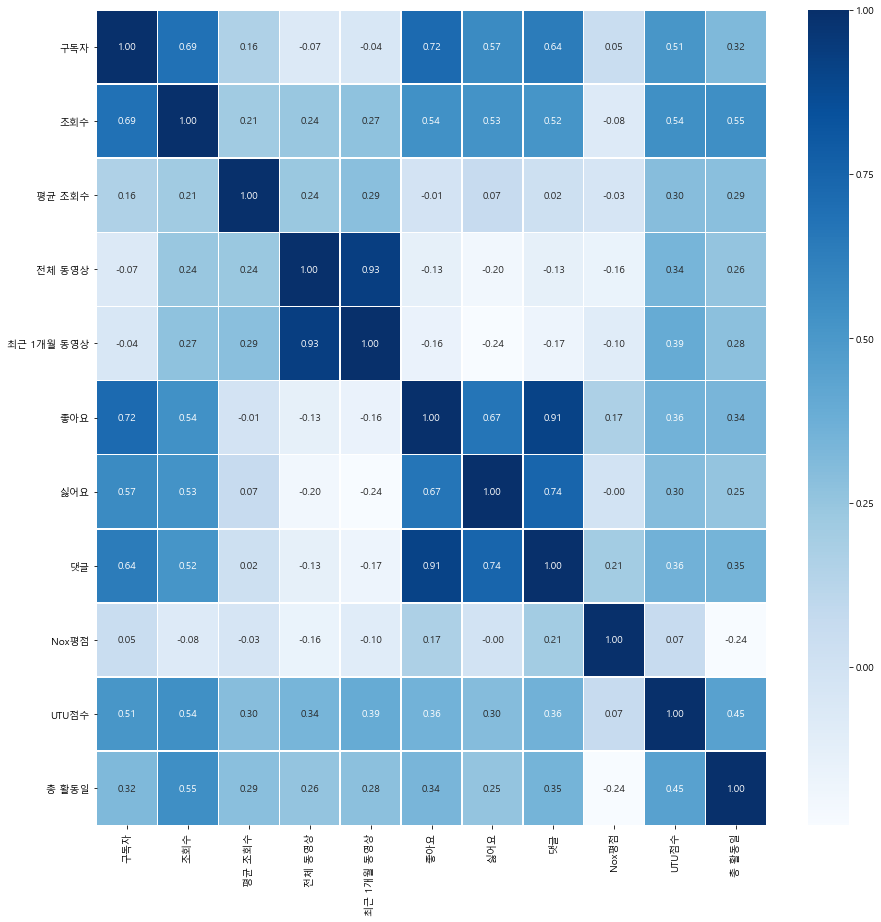

In [359]:
#상관관계를 히트맵으로 시각화
plt.figure(figsize=(15,15))
plt.rc('font', family = 'Malgun Gothic')
sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [360]:
#각 항목별 상관관계가 높은 변수 상위 3개씩 print
for col in corr.columns:
    abs_corr = abs(corr) # 모든 값을 절대값으로 변환 (양수, 음수 상관없이 상관관계도가 높은 항목을 찾기위해)
    abs_sort = abs_corr[col].sort_values() # 오름차순
    corr_series = corr[col]
    print('변수이름:', col)
    for i in range(1,4):
        index = (-1) - i # -1 index는 항상 1.000000 이므로 (자신과 자신의 상관관계이므로) index -2부터 출력
        # 출력은 corr 원본 값을 출력하여 양수, 음수 여부도 출력되게 함
        print('%d. %s %.6f'%(i,abs_sort.index[index], corr_series[abs_sort.index[index]]))
    print('--------------------------------------------------------------------')
    

변수이름: 구독자
1. 좋아요 0.721382
2. 조회수 0.687863
3. 댓글 0.640432
--------------------------------------------------------------------
변수이름: 조회수
1. 구독자 0.687863
2. 총 활동일 0.546465
3. UTU점수 0.539810
--------------------------------------------------------------------
변수이름: 평균 조회수
1. UTU점수 0.295606
2. 총 활동일 0.285877
3. 최근 1개월 동영상 0.285395
--------------------------------------------------------------------
변수이름: 전체 동영상
1. 최근 1개월 동영상 0.927921
2. UTU점수 0.342943
3. 총 활동일 0.257824
--------------------------------------------------------------------
변수이름: 최근 1개월 동영상
1. 전체 동영상 0.927921
2. UTU점수 0.394268
3. 평균 조회수 0.285395
--------------------------------------------------------------------
변수이름: 좋아요
1. 댓글 0.910387
2. 구독자 0.721382
3. 싫어요 0.668512
--------------------------------------------------------------------
변수이름: 싫어요
1. 댓글 0.744321
2. 좋아요 0.668512
3. 구독자 0.566491
--------------------------------------------------------------------
변수이름: 댓글
1. 좋아요 0.910387
2. 싫어요 0.744321
3. 구독자 0.640432
----------

## 'nox평점'과 'UTU점수'처럼 직접 정의하여 '채널 점수' 매기기
### '채널 점수'의 기준
#### 1. 채널 성장도(구독자수, 전체 조회수) - 비중 30%
구독자수와 전체조회수는 그 채널의 성장규모를 가장 잘 보여주는 지표이므로 비중을 제일 크게 두었다.
각각 15%씩 (구독자수 15%, 전체조회수 15%)
#### 2. 활동도, 업데이트 빈도(전체동영상 수/총 활동일, 최근 1개월 동영상 수) - 비중 25%
하루에 올리는 동영상수 = 전체동영상 수/총 활동일,
최근 1개월 동영상 수,
이 두 항목은 활동빈도, 업데이트 빈도 등 얼마나 활발한 채널인지를 나타내주는 지표이다. 각각 12.5%씩
#### 3. 전반적인 동영상 평가(좋아요 수, 싫어요 수) - 비중 25%
좋아요 수가 클수록, 싫어요 수가 적을수록 동영상 품질이 좋다는 뜻이므로
'채널 점수'또한 점수가 높게 나올 것이다. 각각 12.5%씩
#### 4. 동영상 화제도(평균 조회수) - 비중 10%
평균 조회수가 클수록 각 동영상의 화제도가 크다는 의미이므로 '채널 점수'가 높게 나올 것이다
#### 5. 시청자 소통,참여 (댓글 수) - 비중 10%
댓글 수가 클수록 시청자가 활발히 의견을 주고받는 뜻이므로 시청자 소통, 참여 지표로 선정했다.

### 계산 방법 (총 100점 만점)
df3의 75개의 전체 채널을 기준으로 각 항목(구독자수, 전체 조회수 등등)의 값을 sort했을때 각 해당하는 순위에 따라 점수를 차등 지급한다.
예를 들어 댓글 수를 sort했을때 댓글 수(비중 10%) 1위인 채널은 10점을 가져가고, 
꼴등인 채널은 0점을 가져가고, 중간순위인 채널은 5점을 가져간다. 순위별 차등 점수는 (만점 점수)/(전체 등수-1)로 계산한다.

In [361]:
# 채널 점수 값을 추가하고 0점으로 초기화
df3.loc[:,'채널 점수'] = 0.0

In [362]:
# 구독자 순위별로 점수 지급 (만점: 15점)
df3 = df3.sort_values(by='구독자', ascending=False)
score = 15.0
gap = score/(len(df3)-1)
gap = round(gap,6)
for i in range(len(df3)):
    df3.iloc[i, -1] += score
    score -= gap
    
# 전체 조회수 순위별로 점수 지급 (만점: 15점)
df3 = df3.sort_values(by='조회수', ascending=False)
score = 15.0
gap = score/(len(df3)-1)
gap = round(gap,6)
for i in range(len(df3)):
    df3.iloc[i, -1] += score
    score -= gap

In [363]:
# 하루에 올리는 동영상수(전체동영상 수/총 활동일) 열 추가
df3['하루에 올리는 동영상'] = df3['전체 동영상']/df3['총 활동일']

# 하루에 올리는 동영상 순위별로 점수 지급 (만점: 12.5점)
df3 = df3.sort_values(by='하루에 올리는 동영상', ascending=False)
score = 12.5
gap = score/(len(df3)-1)
gap = round(gap,6)
for i in range(len(df3)):
    df3.iloc[i, -2] += score
    score -= gap
    
# 최근 1개월 동영상 순위별로 점수 지급 (만점: 12.5점)
df3 = df3.sort_values(by='최근 1개월 동영상', ascending=False)
score = 12.5
gap = score/(len(df3)-1)
gap = round(gap,6)
for i in range(len(df3)):
    df3.iloc[i, -2] += score
    score -= gap

In [364]:
# 좋아요 순위별로 점수 지급 (만점: 12.5점)
df3 = df3.sort_values(by='좋아요', ascending=False)
score = 12.5
gap = score/(len(df3)-1)
gap = round(gap,6)
for i in range(len(df3)):
    df3.iloc[i, -2] += score
    score -= gap
    
# 싫어요 순위별로 점수 지급 (만점: 12.5점) *싫어요 수가 적을수록 점수를 많이 지급해야 하므로 오름차순으로 정렬할 것
df3 = df3.sort_values(by='싫어요', ascending=True)
score = 12.5
gap = score/(len(df3)-1)
gap = round(gap,6)
for i in range(len(df3)):
    df3.iloc[i, -2] += score
    score -= gap
    
# 평균 조회수 순위별로 점수 지급 (만점: 10점)
df3 = df3.sort_values(by='평균 조회수', ascending=False)
score = 10.0
gap = score/(len(df3)-1)
gap = round(gap,6)
for i in range(len(df3)):
    df3.iloc[i, -2] += score
    score -= gap

# 댓글 수 순위별로 점수 지급 (만점: 10점)
df3 = df3.sort_values(by='댓글', ascending=False)
score = 10.0
gap = score/(len(df3)-1)
gap = round(gap,6)
for i in range(len(df3)):
    df3.iloc[i, -2] += score
    score -= gap

In [365]:
# 채널 점수 높은 순서대로 정렬
df3.sort_values(by='채널 점수', ascending=False)

,채널명,카테고리1,카테고리2,구독자,조회수,평균 조회수,전체 동영상,최근 1개월 동영상,좋아요,싫어요,댓글,Nox평점,UTU점수,채널 개설일,채널주소,총 활동일,채널 점수,하루에 올리는 동영상
10,Mnet K-POP,엔터테인먼트,영화/엔터 > 음악,12600000,7500000000,94790000,17800,292,4590000,54000,360000,4.36,78,2006-03-08,https://www.youtube.com/channel/UCbD8EppRX3ZwJ...,5024.0,77.668911,3.542994
3,SMTOWN,음악,영화/엔터 > 음악,20800000,15700000000,1747500,3939,19,230000000,4860000,22030000,3.39,63,2006-03-18,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,5014.0,73.040531,0.785600
18,MBCentertainment,엔터테인먼트,영화/엔터 > 엔터,6270000,7600000000,3810000,69700,356,710000,15000,100000,2.79,74,2009-07-29,https://www.youtube.com/channel/UCiBr0bK06imaM...,3785.0,73.006751,18.414795
5,1theK (원더케이),엔터테인먼트,영화/엔터 > 음악,18300000,15000000000,20000,16700,251,10200000,190000,730000,3.27,62,2011-01-30,https://www.youtube.com/channel/UCweOkPb1wVVH0...,3235.0,72.364869,5.162287
4,1MILLION Dance Studio,엔터테인먼트,영화/엔터 > 음악,18700000,4500000000,620300,1764,39,58270000,750000,1090000,3.14,75,2015-02-06,https://www.youtube.com/channel/UCw8ZhLPdQ0u_Y...,1767.0,72.331074,0.998302
2,BANGTANTV,음악,영화/엔터 > 엔터,23800000,3200000000,2041300,1101,26,150000000,420000,8530000,4.08,81,2012-12-16,https://www.youtube.com/channel/UCLkAepWjdylmX...,2549.0,71.824310,0.431934
6,jypentertainment,음악,영화/엔터 > 음악,14400000,7800000000,2696700,1038,12,87850000,4080000,9140000,4.48,79,2008-01-24,https://www.youtube.com/channel/UCaO6TYtlC8U5t...,4337.0,67.128364,0.239336
23,M2,엔터테인먼트,영화/엔터 > 엔터,5120000,2800000000,343800,9547,154,7810000,86000,490000,3.43,69,2014-04-29,https://www.youtube.com/channel/UCTQVIXvcHrR9j...,2050.0,66.013503,4.657073
26,ALL THE K-POP,엔터테인먼트,영화/엔터 > 음악,4910000,2500000000,17730000,11100,269,840000,9635,46000,2.83,64,2012-04-25,https://www.youtube.com/channel/UCPde4guD9yFBR...,2784.0,65.743229,3.987069
1,ibighit,음악,영화/엔터 > 엔터,30400000,7500000000,8004400,347,12,140000000,2700000,19300000,4.76,78,2008-06-04,https://www.youtube.com/channel/UC3IZKseVpdzPS...,4205.0,65.675659,0.082521
